## HR Analytics Project- Understanding the Attrition in HR

* <b> Attrition affecting Companies</b>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [3]:
# importing project dependencies:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing dataset 
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Features and Targets:
   <b>INPUT FEATURES</b>:
                   
                   'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
                   'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
                   'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
                   'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                   'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
                   'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                   'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager'
                   
   <b>TARGET FEATURE</b>: 
                   
                   'Attrition'
                   
           


In [10]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())


Size of dataset 
  (1470, 35) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int6

Size of dataset :(1470, 35)
Null values : NO 
DATA TYPE :all INT type but 8 being object type {Attrition BusinessTravel	Department	EducationField	Gender	JobRole	MaritalStatus	Over18	OverTime}

In [11]:
# description of the categorcal features
df.describe(include=np.object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


<b>INFERENCE </b>

* 3 Unique values in business travel. 
* 3 Unique values in types of department in the company. 
* 6 Different types of Education Field working in the company. 
* A total of 9 Positions are there in the company.
* Attrition is a binary target.This means we have to perform classification on this dataset.

In [13]:
# dataset numerical feautres description:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# let's seperate the numerical coulums and the categorical columns:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

ModuleNotFoundError: No module named 'feature_engine.missing_data_imputers'

In [19]:
 df.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [18]:
 df.select_dtypes(include=['int64','float']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
# Let's check for correlations beween the features of the dataset.
df_corr = df.corr()
df_corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


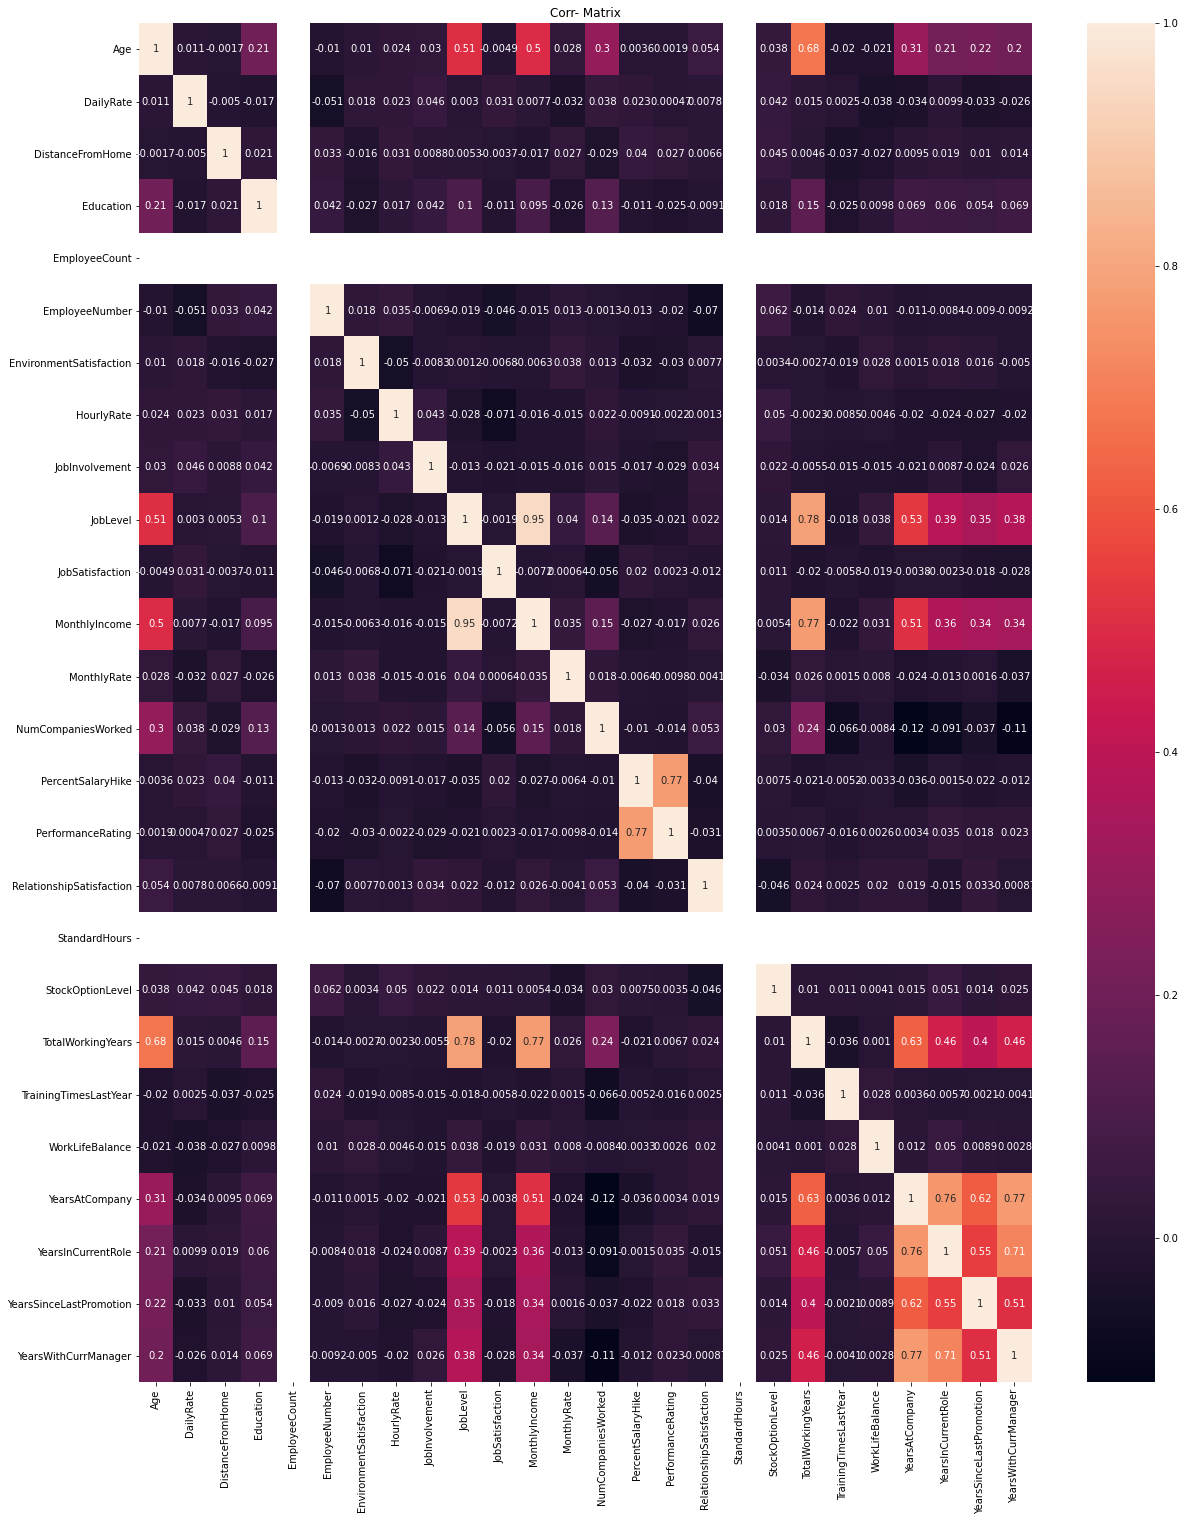

In [23]:
# Visualize with Heat MAP
plt.figure(figsize=[20,25])
sns.heatmap(df_corr,annot=True)
plt.title('Corr- Matrix')
plt.show()

The features monthly incore and job level are highly correlated.

In [ ]:
# Age

<AxesSubplot:xlabel='Age', ylabel='count'>

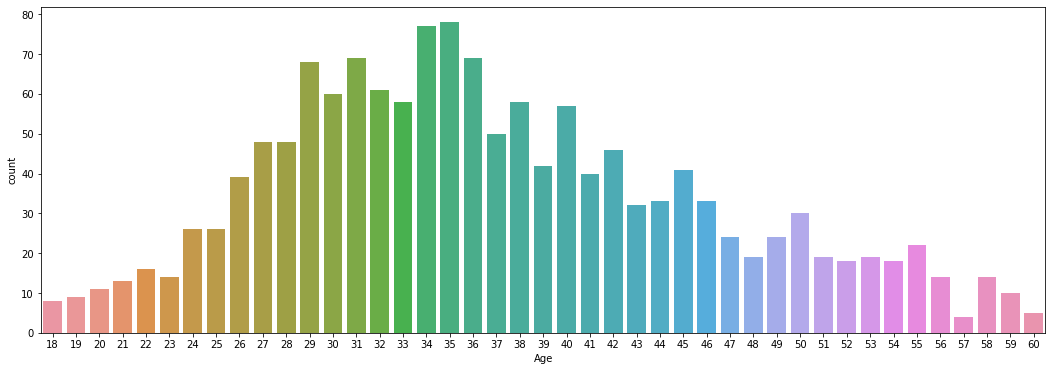

In [24]:
plt.figure(figsize=[18,6])
sns.countplot(df.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

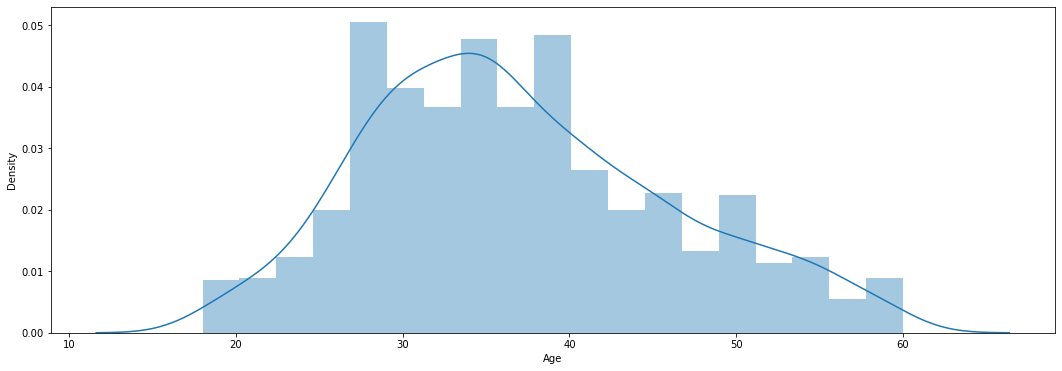

In [25]:
plt.figure(figsize=[18,6])
sns.distplot(df.Age)

* Average age group of 26 to 38 with Minimun age being 18 and max being 60

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

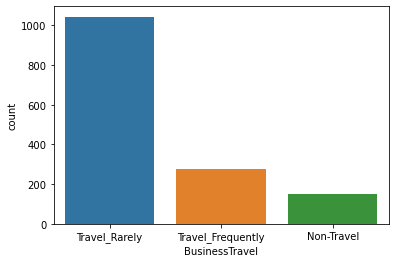

In [27]:
# Business Travel : Categorical
sns.countplot(df.BusinessTravel)

In [28]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [31]:
per = (277 /len(df))*100
per

18.843537414965986

Only 18.84 percent of the total employees.travel on Business travel

In [32]:
# Daily rate

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

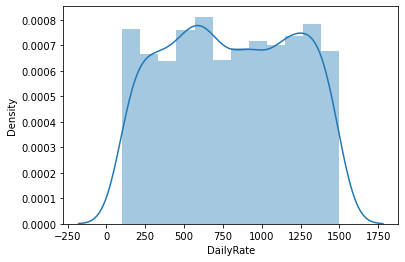

In [34]:
sns.distplot(df.DailyRate)

In [36]:
print('\n the daily wages ranges between',df.DailyRate.min(),'and',df.DailyRate.max())


 the daily wages ranges between 102 and 1499


# Department
df.Department.value_counts().values

<AxesSubplot:xlabel='Department', ylabel='count'>

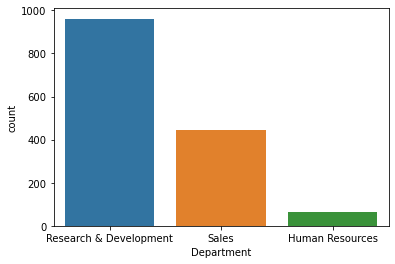

In [37]:
sns.countplot(df.Department,order=df.Department.value_counts().index)


In [40]:
len(df[df.Department == 'Research & Development'])/len(df)*100

65.37414965986395

* The Company has more than 65 percent of employees in the R&D department.
* Every company invests the maximum in Reasearch and Development Departments.
* Sales and HR makes the other 35 percent of the comapny employees.

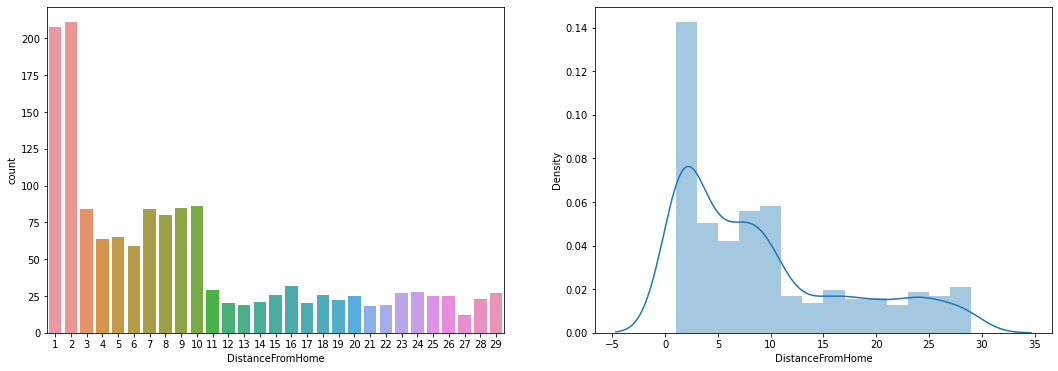

In [43]:
# distance from home
plot = plt.figure(figsize=[18,6])

plot.add_subplot(121)
sns.countplot(df.DistanceFromHome)

plot.add_subplot(122)
sns.distplot(df.DistanceFromHome)

plot.show()

In [ ]:
# The distribution is positively skewed.
# A high number of employees leave in the vicinity of the company ot reduce travelling time and expenses.

In [44]:
## Education field
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

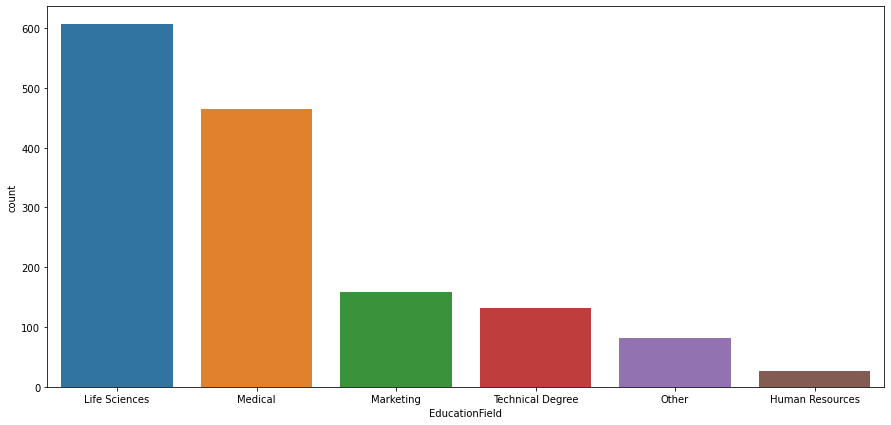

In [47]:
plt.figure(figsize=[15,7])
sns.countplot(df.EducationField,order=df.EducationField.value_counts().index)

In [ ]:
## Education 

In [48]:
df.Education.value_counts()


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

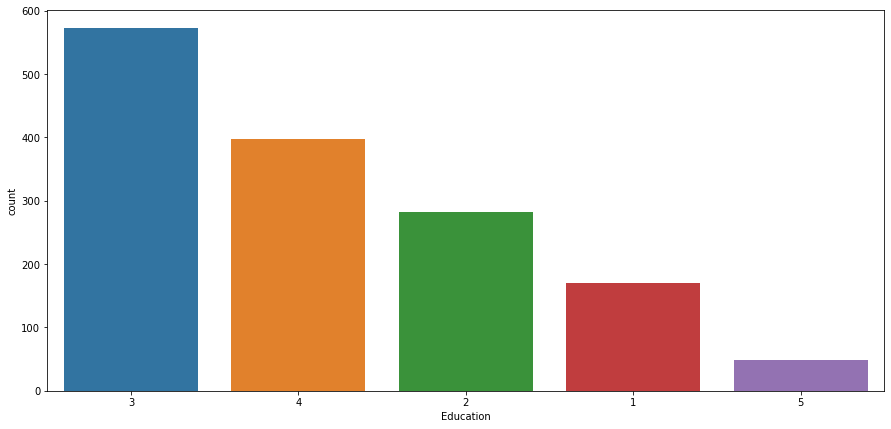

In [49]:
plt.figure(figsize=[15,7])
sns.countplot(df.Education,order=df.Education.value_counts().index)

Education devided int0 catwgories 1 to 5 ,5 being the highest.

In [50]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [51]:
# Relation Satisfaction Level
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

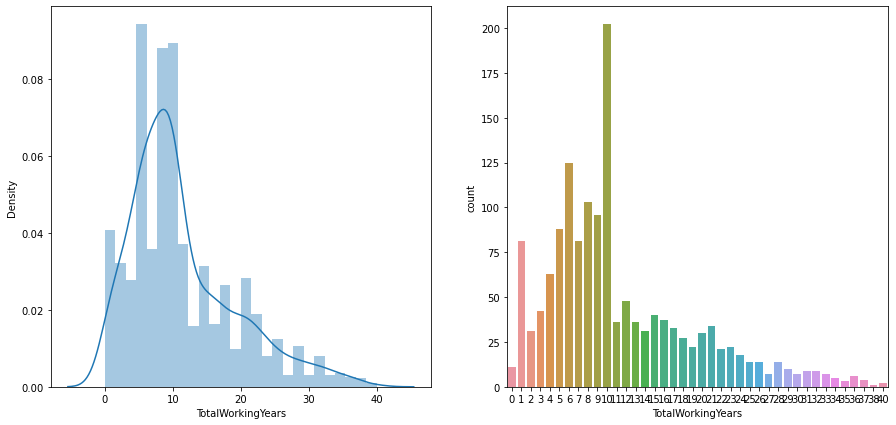

In [52]:
# total working years
fig = plt.figure(figsize=[15,7])

fig.add_subplot(121)
sns.distplot(df.TotalWorkingYears)

fig.add_subplot(122)
sns.countplot(df.TotalWorkingYears)

slightly positive skewed distribution 

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

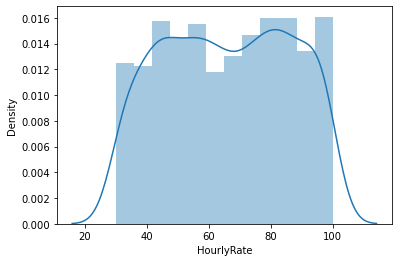

In [53]:
## Hourly rate
sns.distplot(df.HourlyRate)

In [ ]:
#Uniform 

In [54]:
# Job Role
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

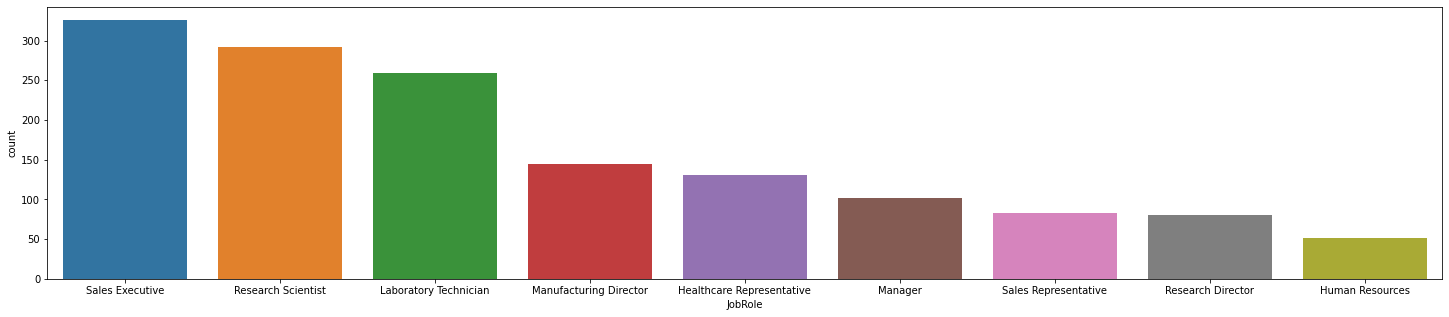

In [60]:
plt.figure(figsize=[25,5])
sns.countplot(df.JobRole,order=df.JobRole.value_counts().index)

* Most of the employees are either sales executives or research scientists or Lab Tecnitian.
*  9 Diff Jobroles

In [61]:
# LABEL ; Attrition
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

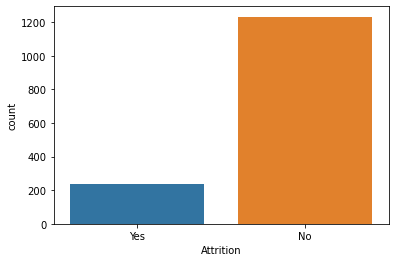

In [62]:
sns.countplot(df.Attrition)

This dataset has imbalance classes

We can address imbalance classes by:

Using sampling methods
Using trees and ensemble algorithms

### Multi-variate Analysis

In [ ]:
# age with attrition

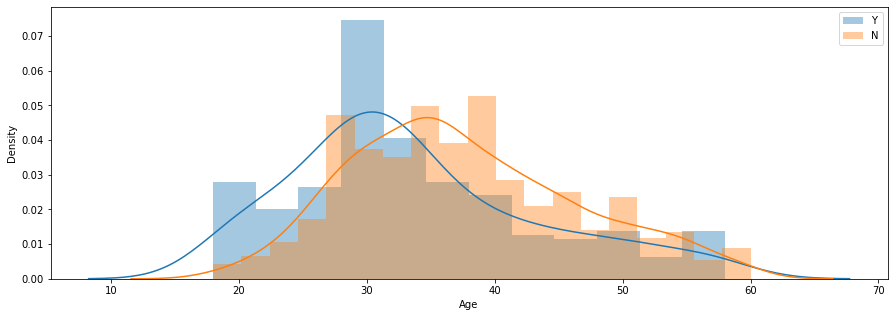

In [65]:
plt.figure(figsize=[15,5])
sns.distplot(df[df.Attrition == 'Yes']['Age'],label='Y')
sns.distplot(df[df.Attrition == 'No']['Age'],label='N')
plt.legend()
plt.show()

* Young aged emps try to leave the jobs

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

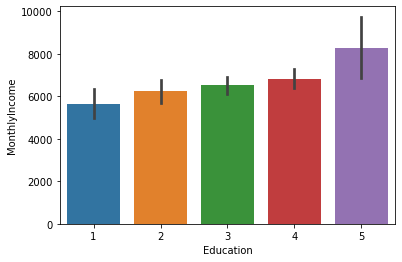

In [66]:
# Education vs monthly income
sns.barplot(df.Education,df.MonthlyIncome)

In [ ]:
#Directly Proportinal as expected 

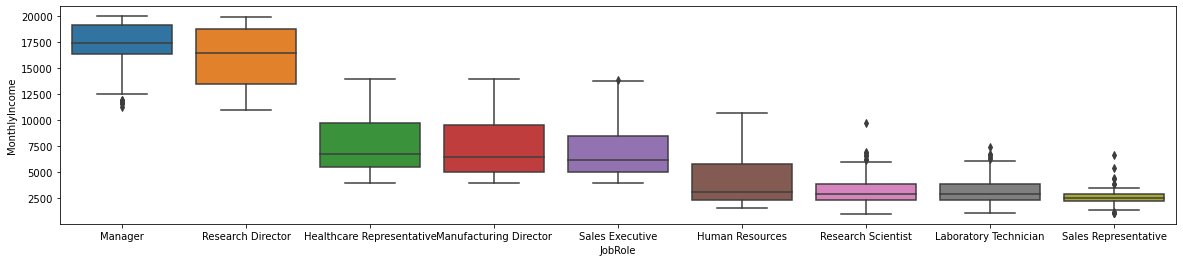

In [68]:

plt.figure(figsize=[20,4])
sns.boxplot(df.JobRole,df.MonthlyIncome,order=df.groupby('JobRole').mean().sort_values('MonthlyIncome',ascending=False)['MonthlyIncome'].index)
plt.show()

* Managers and Research Deirector are the most highly paid job roles in the company.


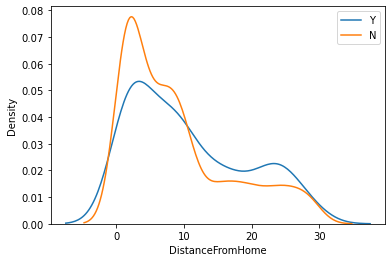

In [70]:
#Commute time vs Job switch i.e DistanceFromHome vs Attrition 
sns.kdeplot(df[df.Attrition == 'Yes']['DistanceFromHome'],label='Y')
sns.kdeplot(df[df.Attrition == 'No']['DistanceFromHome'],label='N')
plt.legend()

* Inferences:
    * Employees residing nearby the company nomally stay with the company rest try to find oppotunitites near by 
    

let's remove the redundant features from the df_cleaned dataframe
Features StandardHours,EmployeeCount,EmployeeNumber,Over18 are redundant to build the model, so we are dropping them as well.

In [134]:
df_cleaned = df.drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)

In [135]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,2,Female,94,3,2,2,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,3,Male,61,2,2,1,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,4,Male,92,2,1,2,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,4,Female,56,3,1,1,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,Male,40,3,1,1,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [136]:
df_num =df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],axis=1)



In [91]:
df_num.co,

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

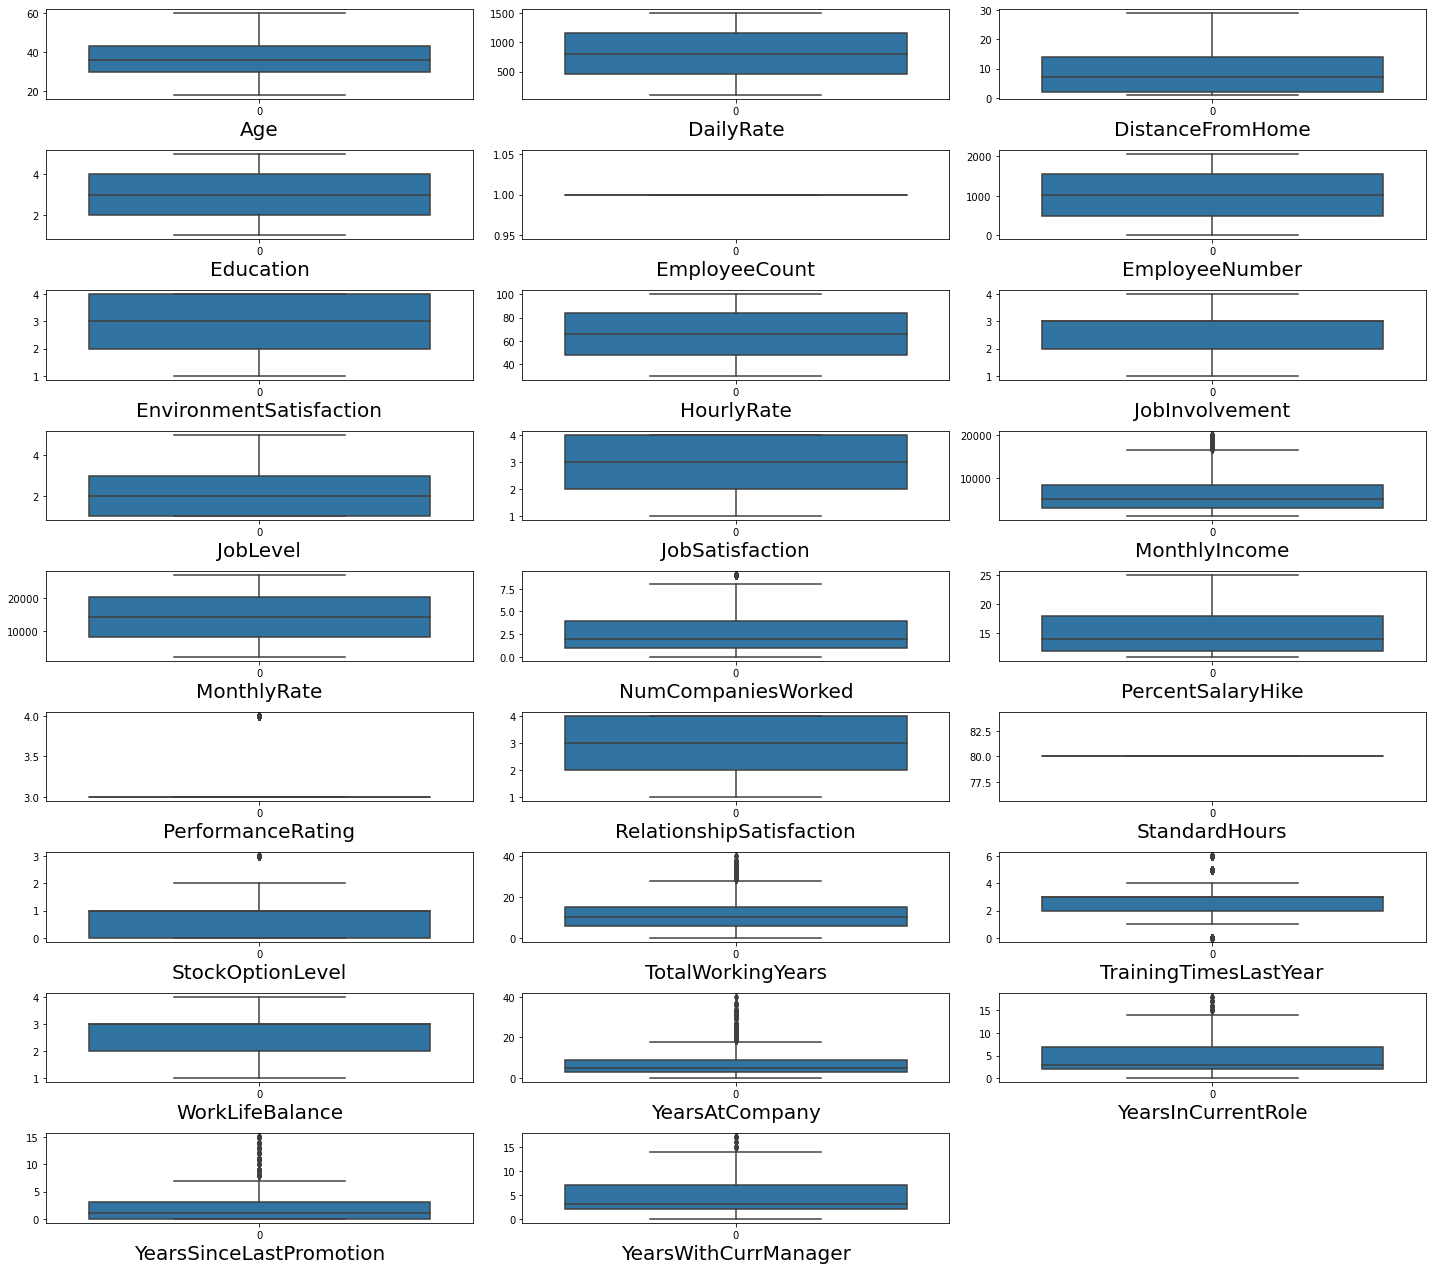

In [137]:
#Visualizartion boxplot 
plt.figure(figsize =(20,25))
plt_num =1
for i in df_num:
    if plt_num<=39:
        ax  =plt.subplot(13,3,plt_num)
        sns.boxplot(data =df_num[i],orient ='v')
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

In [139]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                            13.00
BusinessTravel                  1.00
DailyRate                     692.00
Department                      1.00
DistanceFromHome               12.00
Education                       2.00
EducationField                  2.00
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobRole                         1.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
d

In [140]:
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 3 * IQR)) |(df_cleaned > (Q3 + 3 * IQR))).any(axis=1)]

In [141]:
len(df_cleaned)

1206

In [142]:
# skew stats
df_cleaned.skew()

Age                         0.433475
BusinessTravel             -1.470910
DailyRate                  -0.019154
Department                  0.145281
DistanceFromHome            0.972771
Education                  -0.311870
EducationField              0.541773
EnvironmentSatisfaction    -0.328554
HourlyRate                 -0.022233
JobInvolvement             -0.492983
JobLevel                    1.087102
JobRole                    -0.157800
JobSatisfaction            -0.340888
MonthlyIncome               1.479647
MonthlyRate                 0.006231
NumCompaniesWorked          1.014020
PercentSalaryHike           0.583541
PerformanceRating           0.000000
RelationshipSatisfaction   -0.306168
StockOptionLevel            0.971111
TotalWorkingYears           1.084812
TrainingTimesLastYear       0.574283
WorkLifeBalance            -0.530803
YearsAtCompany              1.333466
YearsInCurrentRole          0.913143
YearsSinceLastPromotion     1.779690
YearsWithCurrManager        0.864407
d

Most of the features are positively skewed.
We can use sqare root and log transformation

In [143]:
np.sqrt(df_cleaned['Age']+1).skew()

0.1640661544013477

In [144]:
np.sqrt(df_cleaned['DailyRate']+1).skew()
np.sqrt(df_cleaned['DistanceFromHome']+1).skew()
np.sqrt(df_cleaned['Education']+1).skew()
np.sqrt(df_cleaned['EnvironmentSatisfaction']+1).skew()
np.sqrt(df_cleaned['HourlyRate']+1).skew()
np.sqrt(df_cleaned['JobInvolvement']+1).skew()
np.sqrt(df_cleaned['JobLevel']+1).skew()
np.sqrt(df_cleaned['JobSatisfaction']+1).skew()
np.sqrt(df_cleaned['MonthlyIncome']+1).skew()
np.sqrt(df_cleaned['MonthlyRate']+1).skew()
np.sqrt(df_cleaned['NumCompaniesWorked']+1).skew()
np.sqrt(df_cleaned['PercentSalaryHike']+1).skew()
np.sqrt(df_cleaned['PerformanceRating']+1).skew()
np.sqrt(df_cleaned['RelationshipSatisfaction']+1).skew()
np.sqrt(df_cleaned['StockOptionLevel']+1).skew()
np.sqrt(df_cleaned['TotalWorkingYears']+1).skew()
np.sqrt(df_cleaned['TrainingTimesLastYear']+1).skew()
np.sqrt(df_cleaned['WorkLifeBalance']+1).skew()
np.sqrt(df_cleaned['YearsAtCompany']+1).skew()
np.sqrt(df_cleaned['YearsAtCompany']+1).skew()
np.sqrt(df_cleaned['YearsInCurrentRole']+1).skew()
np.sqrt(df_cleaned['YearsSinceLastPromotion']+1).skew()
np.sqrt(df_cleaned['YearsWithCurrManager']+1).skew()

0.2727094025904592

In [145]:
# We can drop performance rating from the processing dataframe.
df_cleaned.drop('PerformanceRating',1,inplace=True)

In [146]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,2,Female,94,3,2,2,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
2,37,Yes,2,1373,1,2,2,4,4,Male,92,2,1,2,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,4,Female,56,3,1,1,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,Male,40,3,1,1,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2
5,32,No,1,1005,1,2,2,1,4,Male,79,3,1,2,4,Single,3068,11864,0,No,13,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,No,2,1167,2,5,3,4,4,Female,30,2,1,2,3,Single,2966,21378,0,No,18,4,0,5,2,3,4,2,0,0
1465,36,No,1,884,1,23,2,3,3,Male,41,4,2,1,4,Married,2571,12290,4,No,17,3,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,4,Male,42,2,3,1,1,Married,9991,21457,4,No,15,1,1,9,5,3,7,7,1,7
1468,49,No,1,1023,2,2,3,3,4,Male,63,2,2,1,2,Married,5390,13243,2,No,14,4,0,17,3,2,9,6,0,8


In [147]:
clmn = np.array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [148]:
df_cleaned[clmn] = np.sqrt(df_cleaned[clmn])

In [149]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.403124,Yes,2,33.196385,2,1.000000,1.414214,1,1.414214,Female,9.695360,1.732051,1.414214,2,2.000000,Single,77.414469,19479,8,Yes,11,1.000000,0.0,2.828427,0.000000,1.000000,2.449490,2.000000,0.000000,2.236068
2,6.082763,Yes,2,37.054015,1,1.414214,1.414214,4,2.000000,Male,9.591663,1.414214,1.000000,2,1.732051,Single,45.716518,2396,6,Yes,15,1.414214,0.0,2.645751,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000
3,5.744563,No,1,37.309516,1,1.732051,2.000000,1,2.000000,Female,7.483315,1.732051,1.000000,1,1.732051,Married,53.935146,23159,1,Yes,11,1.732051,0.0,2.828427,1.732051,1.732051,2.828427,2.645751,1.732051,0.000000
4,5.196152,No,2,24.310492,1,1.414214,1.000000,3,1.000000,Male,6.324555,1.732051,1.000000,1,1.414214,Married,58.889727,16632,9,No,12,2.000000,1.0,2.449490,1.732051,1.732051,1.414214,1.414214,1.414214,1.414214
5,5.656854,No,1,31.701735,1,1.414214,1.414214,1,2.000000,Male,8.888194,1.732051,1.000000,2,2.000000,Single,55.389530,11864,0,No,13,1.732051,0.0,2.828427,1.414214,1.414214,2.645751,2.645751,1.732051,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,5.099020,No,2,34.161382,2,2.236068,1.732051,4,2.000000,Female,5.477226,1.414214,1.000000,2,1.732051,Single,54.460995,21378,0,No,18,2.000000,0.0,2.236068,1.414214,1.732051,2.000000,1.414214,0.000000,0.000000
1465,6.000000,No,1,29.732137,1,4.795832,1.414214,3,1.732051,Male,6.403124,2.000000,1.414214,1,2.000000,Married,50.705029,12290,4,No,17,1.732051,1.0,4.123106,1.732051,1.732051,2.236068,1.414214,0.000000,1.732051
1466,6.244998,No,2,24.758837,1,2.449490,1.000000,3,2.000000,Male,6.480741,1.414214,1.732051,1,1.000000,Married,99.954990,21457,4,No,15,1.000000,1.0,3.000000,2.236068,1.732051,2.645751,2.645751,1.000000,2.645751
1468,7.000000,No,1,31.984371,2,1.414214,1.732051,3,2.000000,Male,7.937254,1.414214,1.414214,1,1.414214,Married,73.416619,13243,2,No,14,2.000000,0.0,4.123106,1.732051,1.414214,3.000000,2.449490,0.000000,2.828427


In [114]:
# Categorical Variables Encoding

In [150]:
df_cleaned.Attrition = df_cleaned.Attrition.apply(lambda x:0 if x=='No' else 1)
df_cleaned.Gender = df_cleaned.Gender.apply(lambda x:1 if x=='Male' else 0)
df_cleaned.OverTime = df_cleaned.OverTime.apply(lambda x:1 if x=='Yes' else 0)

In [151]:
from sklearn.preprocessing import LabelEncoder

In [117]:
cat_col = np.array(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
cat_col

array(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'], dtype='<U14')

In [152]:
lab_enc =LabelEncoder()
df_cleaned["BusinessTravel"]  = lab_enc.fit_transform(df_cleaned['BusinessTravel'])
df_cleaned["Department"]  = lab_enc.fit_transform(df_cleaned['Department'])
df_cleaned["EducationField"]  = lab_enc.fit_transform(df_cleaned['EducationField'])
df_cleaned["JobRole"]  = lab_enc.fit_transform(df_cleaned['JobRole'])
df_cleaned["MaritalStatus"]  = lab_enc.fit_transform(df_cleaned['MaritalStatus'])

In [153]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.403124,1,2,33.196385,2,1.000000,1.414214,1,1.414214,0,9.695360,1.732051,1.414214,2,2.000000,2,77.414469,19479,8,1,11,1.000000,0.0,2.828427,0.000000,1.000000,2.449490,2.000000,0.000000,2.236068
2,6.082763,1,2,37.054015,1,1.414214,1.414214,4,2.000000,1,9.591663,1.414214,1.000000,2,1.732051,2,45.716518,2396,6,1,15,1.414214,0.0,2.645751,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000
3,5.744563,0,1,37.309516,1,1.732051,2.000000,1,2.000000,0,7.483315,1.732051,1.000000,1,1.732051,1,53.935146,23159,1,1,11,1.732051,0.0,2.828427,1.732051,1.732051,2.828427,2.645751,1.732051,0.000000
4,5.196152,0,2,24.310492,1,1.414214,1.000000,3,1.000000,1,6.324555,1.732051,1.000000,1,1.414214,1,58.889727,16632,9,0,12,2.000000,1.0,2.449490,1.732051,1.732051,1.414214,1.414214,1.414214,1.414214
5,5.656854,0,1,31.701735,1,1.414214,1.414214,1,2.000000,1,8.888194,1.732051,1.000000,2,2.000000,2,55.389530,11864,0,0,13,1.732051,0.0,2.828427,1.414214,1.414214,2.645751,2.645751,1.732051,2.449490


## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [154]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.


In [155]:
x = df_cleaned.drop('Attrition',axis=1)
y = df_cleaned['Attrition']

In [156]:
len(df),len(df_cleaned)

(1470, 1206)

In [157]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [158]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [159]:
#shapes
print ('XTRAIN \n',x_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',x_test.shape)
print ('YTRAIN \n',y_test.shape)


XTRAIN 
 (844, 29)
YTRAIN 
 (844,)
XTEST 
 (362, 29)
YTRAIN 
 (362,)


In [ ]:
# standard scaling
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(transformers=[('scalar',StandardScaler(),to_scale_features)],remainder='passthrough')

In [160]:
# importing the training dependencies:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [187]:
# importing the evaluation metrics despendencies
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,auc,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,roc_auc_score

In [162]:
# A function to wirte less code 
def train_n_ret_scores(model):
    """
    Input: model for fitting the data.
    Output: scores on the test set
    """
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    print(classification_report(y_test,y_preds))

In [166]:
# Model1 : Logistic Regression
train_n_ret_scores(LogisticRegression())

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       293
           1       0.60      0.09      0.15        69

    accuracy                           0.81       362
   macro avg       0.71      0.54      0.52       362
weighted avg       0.78      0.81      0.75       362



In [163]:
# Model2: Decision Tree

train_n_ret_scores(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       293
           1       0.37      0.32      0.34        69

    accuracy                           0.77       362
   macro avg       0.61      0.59      0.60       362
weighted avg       0.75      0.77      0.76       362



In [164]:
# Model3: Random Forest

train_n_ret_scores(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       293
           1       0.82      0.13      0.23        69

    accuracy                           0.83       362
   macro avg       0.82      0.56      0.56       362
weighted avg       0.83      0.83      0.77       362



In [165]:
# Model4: AdaAdaBoostClassifier

train_n_ret_scores(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       293
           1       0.53      0.25      0.34        69

    accuracy                           0.81       362
   macro avg       0.69      0.60      0.61       362
weighted avg       0.78      0.81      0.79       362



In [167]:
# Model5: Sipport Vector MAchine Classifier

train_n_ret_scores(SVC())

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       293
           1       0.00      0.00      0.00        69

    accuracy                           0.81       362
   macro avg       0.40      0.50      0.45       362
weighted avg       0.66      0.81      0.72       362



In [168]:
# Model6: KNN

train_n_ret_scores(KNeighborsClassifier(n_neighbors=5))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       293
           1       0.14      0.03      0.05        69

    accuracy                           0.78       362
   macro avg       0.48      0.49      0.46       362
weighted avg       0.68      0.78      0.72       362



In [171]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(x_train,y_train)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    y_preds = model.predict(x_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,x,y,cv=KFold(n_splits=5,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

In [172]:
models_df

,Train_Acc,Test_Acc,Precision,Recall,F1_score,Avg_CV
Model,,,,,,
LogisticRegression,0.866114,0.814917,0.600000,0.086957,0.151899,0.848260
DecisionTreeClassifier,1.000000,0.756906,0.353846,0.333333,0.343284,0.773619
RandomForestClassifier,1.000000,0.828729,0.769231,0.144928,0.243902,0.853239
AdaBoostClassifier,0.909953,0.814917,0.531250,0.246377,0.336634,0.863197
KNeighborsClassifier,0.863744,0.781768,0.142857,0.028986,0.048193,0.812616
SVC,0.854265,0.809392,0.000000,0.000000,0.000000,0.840808


In [176]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(LogisticRegression()),KNeighborsClassifier(),SVC(),]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC'.split(',')

models_df_AUC = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Avg_CV','Avg_CV_ROC_AUC'])

for model,model_names in zip(models,model_names):
    #print(model,model_names)
    model.fit(x_train,y_train)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    y_preds = model.predict(x_test)

    avg_cv = np.mean(cross_val_score(model,x,y,cv=KFold(n_splits=5,shuffle=True,random_state=42),scoring='accuracy'))
    
    avg_cv_roc_auc = np.mean(cross_val_score(model,x,y,cv=KFold(n_splits=5,shuffle=True,random_state=42),scoring='roc_auc'))
    #print(train_acc,test_acc,avg_cv,avg_cv_roc_auc)
    models_df_AUC = models_df_AUC.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Avg_CV':avg_cv,'Avg_CV_ROC_AUC':avg_cv_roc_auc},ignore_index=True)
    #print(models_df_new)
#models_df_new.set_index('Model',inplace=True)

In [177]:
models_df_AUC

,Model,Train_Acc,Test_Acc,Avg_CV,Avg_CV_ROC_AUC
0,LogisticRegression,0.866114,0.814917,0.848260,0.743665
1,DecisionTreeClassifier,1.000000,0.779006,0.777772,0.581064
2,RandomForestClassifier,1.000000,0.825967,0.852406,0.782520
3,AdaBoostClassifier,0.854265,0.809392,0.841634,0.744851
4,KNeighborsClassifier,0.863744,0.781768,0.812616,0.499560
5,SVC,0.854265,0.809392,0.840808,0.496850


We can see that AdaBoost Classifier with Logistic Regression as the base model is woking great
ROC_AUC is one of the best metric to check the performance on the imbalanced dataset.

### BEST MODEL after considering Cross Validation will be Random Forest as the difference for it model  is lower amongst all

In [180]:
### HyperParaneter Tuning for RANDOM FOREST

In [181]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[200,700],
            'max_features': ['auto','log2'],
            'max_depth':[4,6,8],
            'criterion' : ['gini']}

In [183]:
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 700]})

In [184]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 700}

## Making THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [188]:
from sklearn.ensemble import RandomForestClassifier

RF_MOD = RandomForestClassifier(criterion='gini',
 max_depth= 6,
 max_features= 'auto',
 n_estimators= 700)
RF_MOD.fit(x_train,y_train)
yrf_tuned=RF_MOD.predict(x_test)
acc_RF_MOD= accuracy_score(y_test,yrf_tuned)
print('Accuracy_Random_Forest_Hypertuned',acc_RF_MOD)
print('\n Classification Report_RF_MOD')
print(classification_report(y_test,yrf_tuned))
print(confusion_matrix(y_test,yrf_tuned))

Accuracy_Random_Forest_Hypertuned 0.8176795580110497

 Classification Report_RF_MOD
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       0.80      0.06      0.11        69

    accuracy                           0.82       362
   macro avg       0.81      0.53      0.50       362
weighted avg       0.81      0.82      0.75       362

[[292   1]
 [ 65   4]]


In [189]:
#### AOC CURVE  

In [193]:
roc_auc_score(y_test,yrf_tuned)

0.5272790226047386

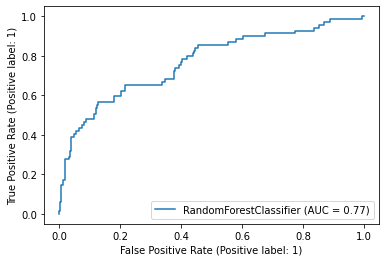

In [195]:
disp = plot_roc_curve(RF_MOD,x_test,y_test)
plt.show()

### Saving the model

In [196]:
#Dumping the model 
import joblib as jl
jl.dump(RF_MOD,'HR_ANALYTICS_case_study.pk')

['HR_ANALYTICS_case_study.pk']